# Project Name :- Heart Disease Prediction

# Group ID :- PTID-CDS-MAY-25-2657

# Project ID :- PRCP-1016-HeartDieseasePred

## Introduction

**Cardiovascular diseases (CVDs)** are the leading cause of death globally, accounting for approximately **17.9 million deaths per year**, or **31% of all deaths worldwide**. Most of these fatalities are due to **heart attacks** and **strokes**, with **one-third occurring prematurely** in individuals under the age of 70.

Early detection and management of heart disease are crucial, especially for individuals with risk factors such as **hypertension, diabetes, and high cholesterol**. This is where **machine learning** can play a vital role in predicting and preventing life-threatening outcomes.

This project uses a publicly available dataset containing **11 key health indicators** to build and evaluate machine learning models that can **predict the likelihood of heart disease**. By leveraging data science, we aim to support better diagnosis, risk assessment, and preventive strategies in the fight against heart disease.

## Domain Analysis

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

- **slope_of_peak_exercise_st_segment** (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart.

- **thal** (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect.

- **resting_blood_pressure** (type: int): resting blood pressure.

- **chest_pain_type** (type: int): chest pain type (4 values).

- **num_major_vessels** (type: int): number of major vessels (0-3) colored by flourosopy.

- **fasting_blood_sugar_gt_120_mg_per_dl** (type: binary): fasting blood sugar > 120 mg/dl.

- **resting_ekg_results** (type: int): resting electrocardiographic results (values 0,1,2).

- **serum_cholesterol_mg_per_dl** (type: int): serum cholestoral in mg/dl.

- **oldpeak_eq_st_depression** (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms.

- **sex** (type: binary): 0: female, 1: male.

- **age** (type: int): age in years.

- **max_heart_rate_achieved** (type: int): maximum heart rate achieved (beats per minute).

- **exercise_induced_angina** (type: binary): exercise-induced chest pain (0: False, 1: True).

- **heart_disease_present** (type: binary): which represents whether or not a patient has heart disease. (0 : no heart disease present, 1 : heart disease present)

## Aim of the Project:

Our goal is to predict the Binary class heart disease present, which represents whether or not a patient has heart disease.

- 0 represents no heart disease present.
- 1 represents heart disease present.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
 d1 = pd.read_csv(r"C:\Users\jeeva\Downloads\PRCP-1016-HeartDieseasePred\Data\labels.csv")


In [4]:
d1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
d2 = pd.read_csv(r"C:\Users\jeeva\Downloads\PRCP-1016-HeartDieseasePred\Data\values.csv")

In [6]:
d2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [242]:
df = pd.concat([d2,d1.drop('patient_id',axis=1)],axis=1)

In [243]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

- The dataset has **12 integer**, **1 float**, and **2 categorical (object)** type columns.  
- These columns represent various patient health metrics and risk indicators.


In [10]:
df.shape

(180, 15)

- The dataset contains **15 features** and **180 samples**.  
- **heart_disease_present** is the target variable, and the rest are independent features.


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [12]:
df.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [13]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

- There are **no null values** present in the dataset, indicating it is **clean and complete**.


In [244]:
df['slope_of_peak_exercise_st_segment'].unique()

array([1, 2, 3], dtype=int64)

In [245]:
df['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

## Exploratory Data Analysis

### Univariate Analysis

In [16]:
for col in df.columns:
    print(f"**************** '{col}' *******************")
    print(df[col].unique())
    print('\n')
    print(df[col].value_counts())
    print("*****************************************************************")
    print('\n')

**************** 'patient_id' *******************
['0z64un' 'ryoo3j' 'yt1s1x' 'l2xjde' 'oyt4ek' 'ldukkw' '2gbyh9' 'daa9kp'
 '3nwy2n' '1r508r' 'ldg4b9' 'xc17yq' 'mpggsq' 'zlyac8' 'f06u72' '2fv3rc'
 'qyrkxn' '237mql' 'mc750a' '30v796' 'cvux3j' 'k8899q' 'jhdvtb' '5g9v0h'
 '83asqd' 'gla0im' 'zzmfh7' 'f4g1ay' 'lek9q9' '8265rl' '6017a1' 'z7xkou'
 'k7ef7h' '0n5fu0' '55xksg' 'pjgqa3' 'xkdz7j' 'tpuevg' 'ascl42' '1xwoe6'
 'ty4ik8' 'gx6yxl' 'hlmts5' 'yx0q6k' 'ep1o51' 'gj1e5z' '6219kl' 'rp9g6x'
 '1aeaff' 'y3prof' '3drd48' 'ejo7p3' 'r7y4i1' 'mznwxv' '27oevk' 'jwqi3k'
 '328lkl' 'tlk9o8' 'aq2vrq' 'ilogfb' 'rv6siv' 'm2a4i9' 'pwigd8' 'qwapdq'
 '4sd1xn' 'nck22c' 'm6zksp' 'f70grj' 'k1art8' 'mcwqgs' '3jsjqk' 'ik7hfs'
 'qwj1yf' 'qvhk9e' 'igwnqo' '4v0q7o' 'hh2awp' 'vfjppl' '6lu42b' 'shiro4'
 '3wl3z4' 'ebioez' '37c0vm' 'v52zcs' '6nkcaw' 'hfp05i' 'grfxwd' 'bvcxah'
 'i49srr' '93dbhq' 'jscmp8' 'zaytyf' 'wze8qm' 'w3933i' '7uch9x' 'dy5hxt'
 'c0gkqc' 'z5g5p3' 'h3uzv8' 'bthqr4' 'rfj25e' '9f92et' '24fopx' 'ldr1mz'
 

In [17]:
df = df.drop('patient_id', axis = 1)

We removed the 'patient_id' column from the dataset because it contains only unique values and does not contribute any meaningful information for model training or prediction

In [18]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [19]:
col = df.select_dtypes(include='object')

In [20]:
col

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect
...,...
175,reversible_defect
176,normal
177,reversible_defect
178,normal


In [21]:
number = df.select_dtypes(exclude="object")

In [22]:
number

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [23]:
col.value_counts()

thal             
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

## Bivariate Analysis

We will analyze the relationship between each independent variable and the dependent variable to identify any significant patterns or characteristics that may influence the prediction of heart disease

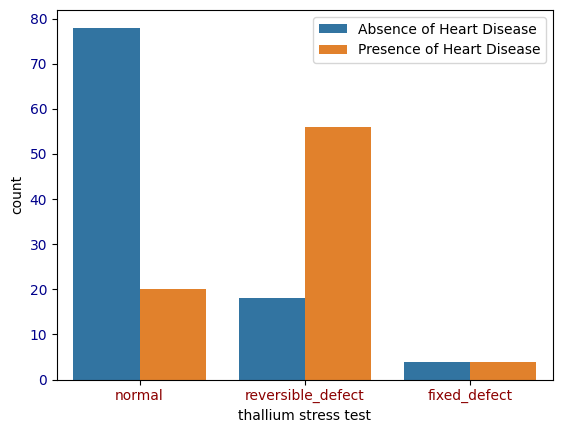

In [24]:
# Bivariate analysis for the catergorical column
# thallium stress test
sns.countplot(data = df,x = 'thal',hue = 'heart_disease_present',)
plt.xlabel('thallium stress test')
plt.ylabel('count')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkblue')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

The thallium stress test is a type of nuclear imaging test used to evaluate how well blood flows into the heart muscle, both at rest and during physical activity or stress. It helps in diagnosing coronary artery disease (CAD) and assessing the severity of any existing heart issues.

In [25]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [26]:
## Discreate numeric variable 

discreate = ['slope_of_peak_exercise_st_segment',
'chest_pain_type',
'num_major_vessels',
'fasting_blood_sugar_gt_120_mg_per_dl',
'resting_ekg_results',
'sex',
'exercise_induced_angina']

In [27]:
## Continous numberic variable

continous = ['resting_blood_pressure',
'serum_cholesterol_mg_per_dl',	
'oldpeak_eq_st_depression',
'age',
'max_heart_rate_achieved']

In [28]:
discreate

['slope_of_peak_exercise_st_segment',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina']

# Bivariate Analysis for Discreate numeric variable

### Slope of peak excercise st segment

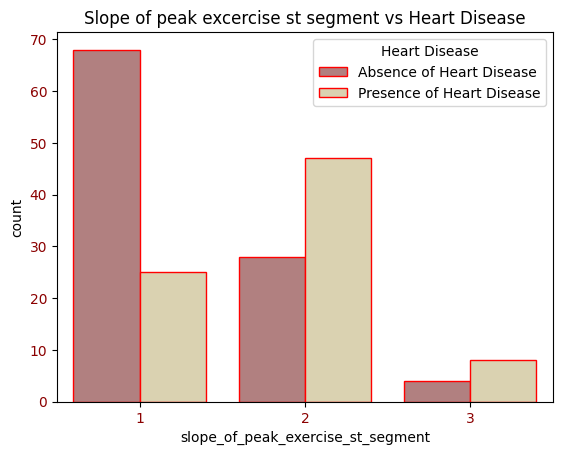

In [29]:
sns.countplot(data = df, x="slope_of_peak_exercise_st_segment", hue = 'heart_disease_present', edgecolor = 'red',palette = 'pink')
plt.xlabel("slope_of_peak_exercise_st_segment")
plt.ylabel("count")
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(title='Heart Disease',labels=['Absence of Heart Disease', 'Presence of Heart Disease'])

plt.title("Slope of peak excercise st segment vs Heart Disease")
plt.show()

### Slope of Peak Exercise ST Segment

The **slope of the ST segment** during peak exercise in an **electrocardiogram (ECG)** is a key parameter used to assess **myocardial ischemia**. Myocardial ischemia occurs when the heart muscle doesn't receive enough oxygen due to reduced blood flow, commonly caused by **coronary artery disease**.

The level of **ST segment depression** provides insight into the severity of ischemia:

- **Mild Depression (< 1mm)**: Associated with a lower likelihood of ischemia.
- **Moderate Depression (1-2mm)**: Indicates a moderate chance of ischemia.
- **Severe Depression (> 2mm)**: Strongly suggests significant ischemia.

In our dataset, most of the data points have a value of **1** for **'slope_of_peak_exercise_st_segment'**, indicating mild depression and a lower likelihood of heart disease. However, higher values are associated with an increased likelihood of heart disease.


### chest_pain_type

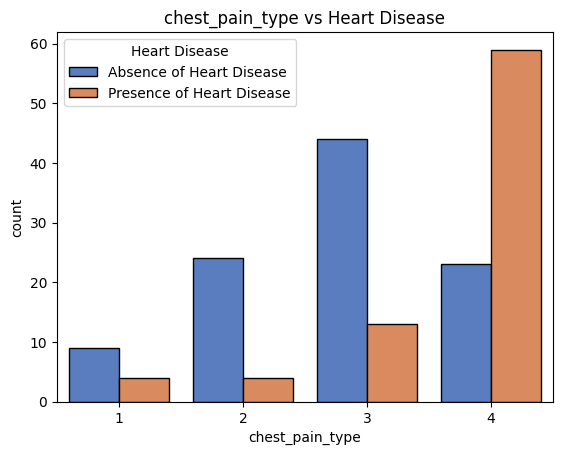

In [30]:
sns.countplot(data = df, x='chest_pain_type', hue = 'heart_disease_present', edgecolor = 'Black', palette = 'muted')
plt.xlabel("chest_pain_type")
plt.ylabel("count")
plt.xticks(color = "Black")
plt.yticks(color = "Black")
plt.legend(title='Heart Disease',labels=['Absence of Heart Disease', 'Presence of Heart Disease'])

plt.title("chest_pain_type vs Heart Disease")
plt.show()

### Chest Pain Type and Heart Disease

**Chest pain type** is commonly categorized using the **Canadian Cardiovascular Society (CCS) classification** for angina pectoris, which is as follows:

- **Class I**: Angina occurs only with strenuous exertion.
- **Class II**: Slight limitation of ordinary activity (e.g., walking or climbing stairs quickly).
- **Class III**: Marked limitation of ordinary physical activity (e.g., walking one or two blocks).
- **Class IV**: Inability to carry out any physical activity without discomfort; angina may occur even at rest.

In our dataset, the majority of individuals belong to **Class IV**, which indicates **severe chest pain** and is strongly associated with the **presence of heart disease**. Conversely, people with chest pain types of **Class I, II, and III** have a lower likelihood of having heart disease.


### num_major_vessels
 

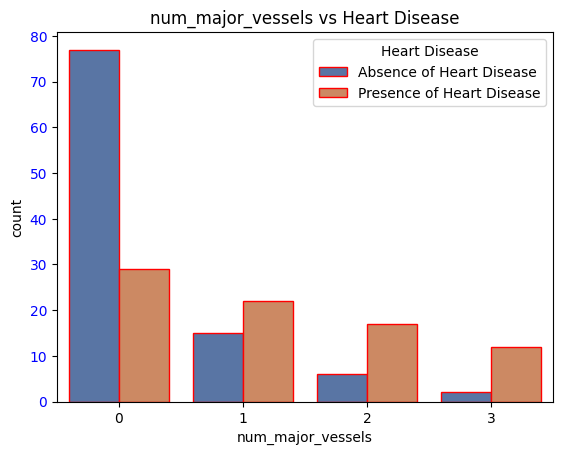

In [31]:
sns.countplot(data = df, x= 'num_major_vessels', hue = 'heart_disease_present', edgecolor = "red", palette = "deep")
plt.xlabel('num_major_vessels')
plt.ylabel('count')
plt.xticks(color = "black")
plt.yticks(color = 'blue')
plt.legend(title='Heart Disease',labels=['Absence of Heart Disease', 'Presence of Heart Disease'])

plt.title("num_major_vessels vs Heart Disease")
plt.show()
 

### Major Vessels Colored by Fluoroscopy and Heart Disease

The **number of major vessels colored by fluoroscopy** is a key factor observed during **coronary angiography**, a procedure used to visualize coronary arteries and detect any **blockages or narrowing (stenosis)**.

The interpretation is as follows:

- **0 vessels**: No significant stenosis in the major coronary arteries.
- **1 vessel**: Significant stenosis in one major artery.
- **2 vessels**: Significant stenosis in two major arteries.
- **3 vessels**: Significant stenosis in all three major arteries.

This metric helps assess the **severity of coronary artery disease (CAD)**. In our dataset, most individuals fall into the **0-vessel category**, indicating a **lower likelihood of heart disease**. On the other hand, individuals with **1, 2, or 3 vessels affected** show a **higher likelihood of heart disease** presence.


### fasting_blood_sugar_gt_120_mg_per_dl
 

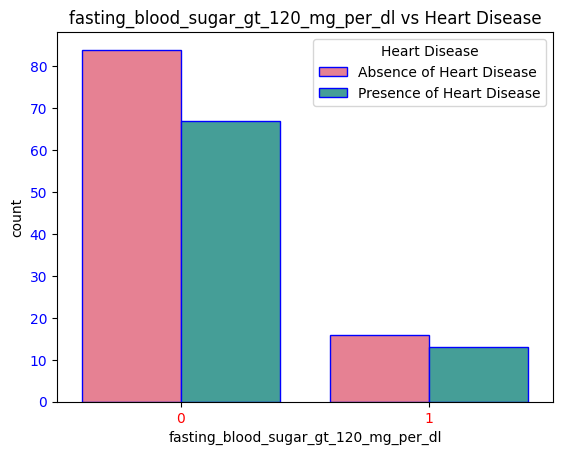

In [32]:
sns.countplot(data = df, x= 'fasting_blood_sugar_gt_120_mg_per_dl', hue = 'heart_disease_present', edgecolor = "blue", palette = "husl")
plt.xlabel("fasting_blood_sugar_gt_120_mg_per_dl")
plt.ylabel("count")
plt.xticks(color = "red")
plt.yticks(color = "blue")
plt.legend(title='Heart Disease',labels=['Absence of Heart Disease', 'Presence of Heart Disease'])

plt.title("fasting_blood_sugar_gt_120_mg_per_dl vs Heart Disease")
plt.show()


### Fasting Blood Sugar and Heart Disease

- A **fasting blood glucose level**:
  - Less than **100 mg/dL** is considered **normal**.
  - Between **100–120 mg/dL** indicates **impaired fasting glucose** (pre-diabetes).
  - Greater than **120 mg/dL** is typically classified as **diabetic**.
  
- In our dataset:
  - A value of **1** indicates a person has fasting blood sugar **> 120 mg/dL**.
  - A value of **0** indicates fasting blood sugar **< 120 mg/dL**.

Although the majority of people in the dataset have fasting blood sugar levels below 120 mg/dL, there is still a notable **presence of heart disease** within this group. This suggests that **fasting blood sugar alone is not a sufficient indicator** for predicting heart disease and should be considered alongside other risk factors.


### resting_ekg_results
 

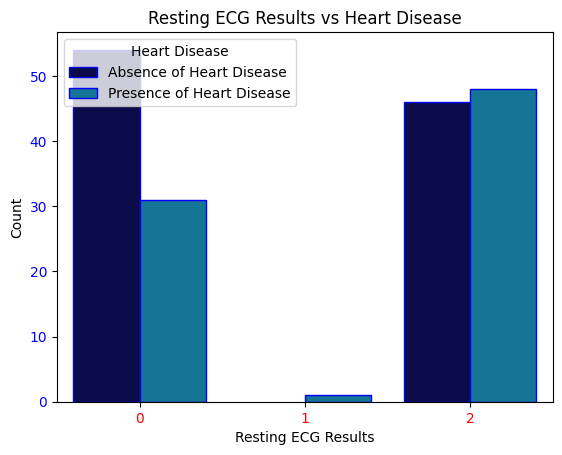

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='resting_ekg_results',hue='heart_disease_present',edgecolor="blue",palette="ocean")

plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.xticks(color='red')  # Optional: Add labels if needed
plt.yticks(color='blue')
plt.legend(title='Heart Disease', labels=['Absence of Heart Disease', 'Presence of Heart Disease'])
plt.title("Resting ECG Results vs Heart Disease")
plt.show()


### Resting EKG Results

The **resting electrocardiogram (EKG)** is performed while the patient is lying down at rest. It is a standard diagnostic test often conducted in a doctor's office, clinic, or hospital.

- **Value 0**: Normal EKG
- **Value 1**: ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression > 0.05 mV)
- **Value 2**: Probable or definite **left ventricular hypertrophy** according to Estes' criteria

### Insights:
- **Value 2**: Individuals in this category show a **similar chance of having or not having** heart disease.
- **Value 0**: The majority of individuals show **no presence of heart disease**, although some with heart disease are also present in this group.
- **Value 1**: This category contains **only one instance**, which is statistically insignificant. Therefore, we will **exclude Value 1** from further analysis and focus on **Value 0 and Value 2** for more meaningful insights.


## sex


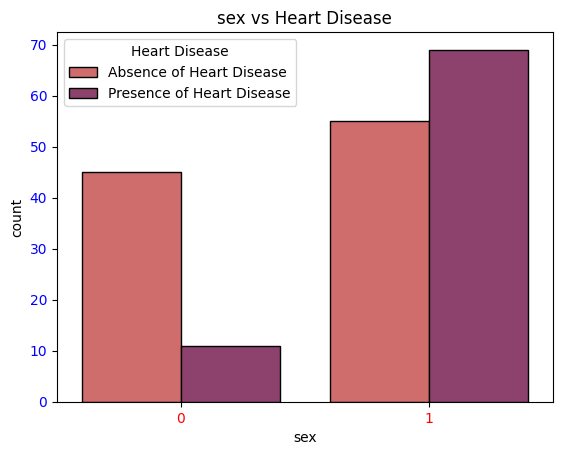

In [34]:
sns.countplot(data = df, x = 'sex', hue = 'heart_disease_present', edgecolor = 'black', palette = 'flare')
plt.xlabel("sex")
plt.ylabel("count")
plt.xticks(color = "red")
plt.yticks(color = "Blue")
plt.legend(title='Heart Disease',labels=['Absence of Heart Disease', 'Presence of Heart Disease'])

plt.title("sex vs Heart Disease")
plt.show()
              

### Insights on Sex 

- In this dataset, **0 represents females** and **1 represents males**.
- The majority of the records are from **male patients**, and they show a **higher incidence of heart disease**.
- **Female patients** are fewer in number, and most of them **do not exhibit signs of heart disease**.


### exercise_induced_angina

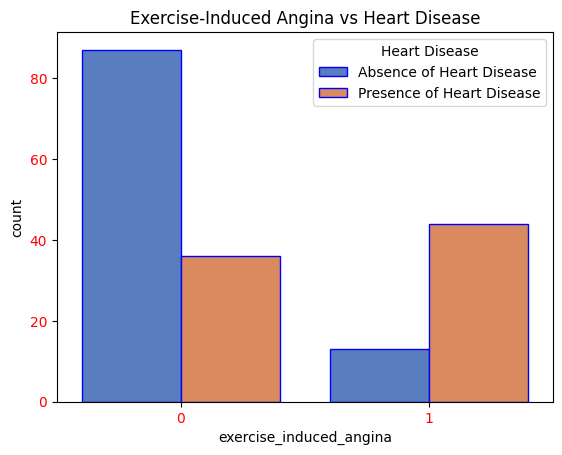

In [35]:
sns.countplot(data = df, x= "exercise_induced_angina", hue = 'heart_disease_present', edgecolor = "Blue",palette = "muted")
sns.dark_palette("#79C")

plt.xlabel('exercise_induced_angina')
plt.ylabel('count')
plt.xticks(color = "red")
plt.yticks(color = 'red')
plt.legend(title='Heart Disease',labels=['Absence of Heart Disease', 'Presence of Heart Disease'])

plt.title("Exercise-Induced Angina vs Heart Disease")
plt.show()

### Insight: Exercise-Induced Angina and Heart Disease

**Exercise-Induced Angina (Exertional Angina)** is chest pain that occurs when the heart muscle doesn't receive enough oxygen-rich blood during physical exertion. It is commonly associated with **Coronary Artery Disease (CAD)**.

- In this dataset, **0 indicates no angina** and **1 indicates presence of exercise-induced angina**.
- The **majority of individuals** in the dataset **do not have exercise-induced angina**, and thus show a **lower likelihood of heart disease**.
- On the other hand, those who **do experience angina during exercise** are at a **higher risk of heart disease**.


# Bivariate Analysis for Continous numeric variable

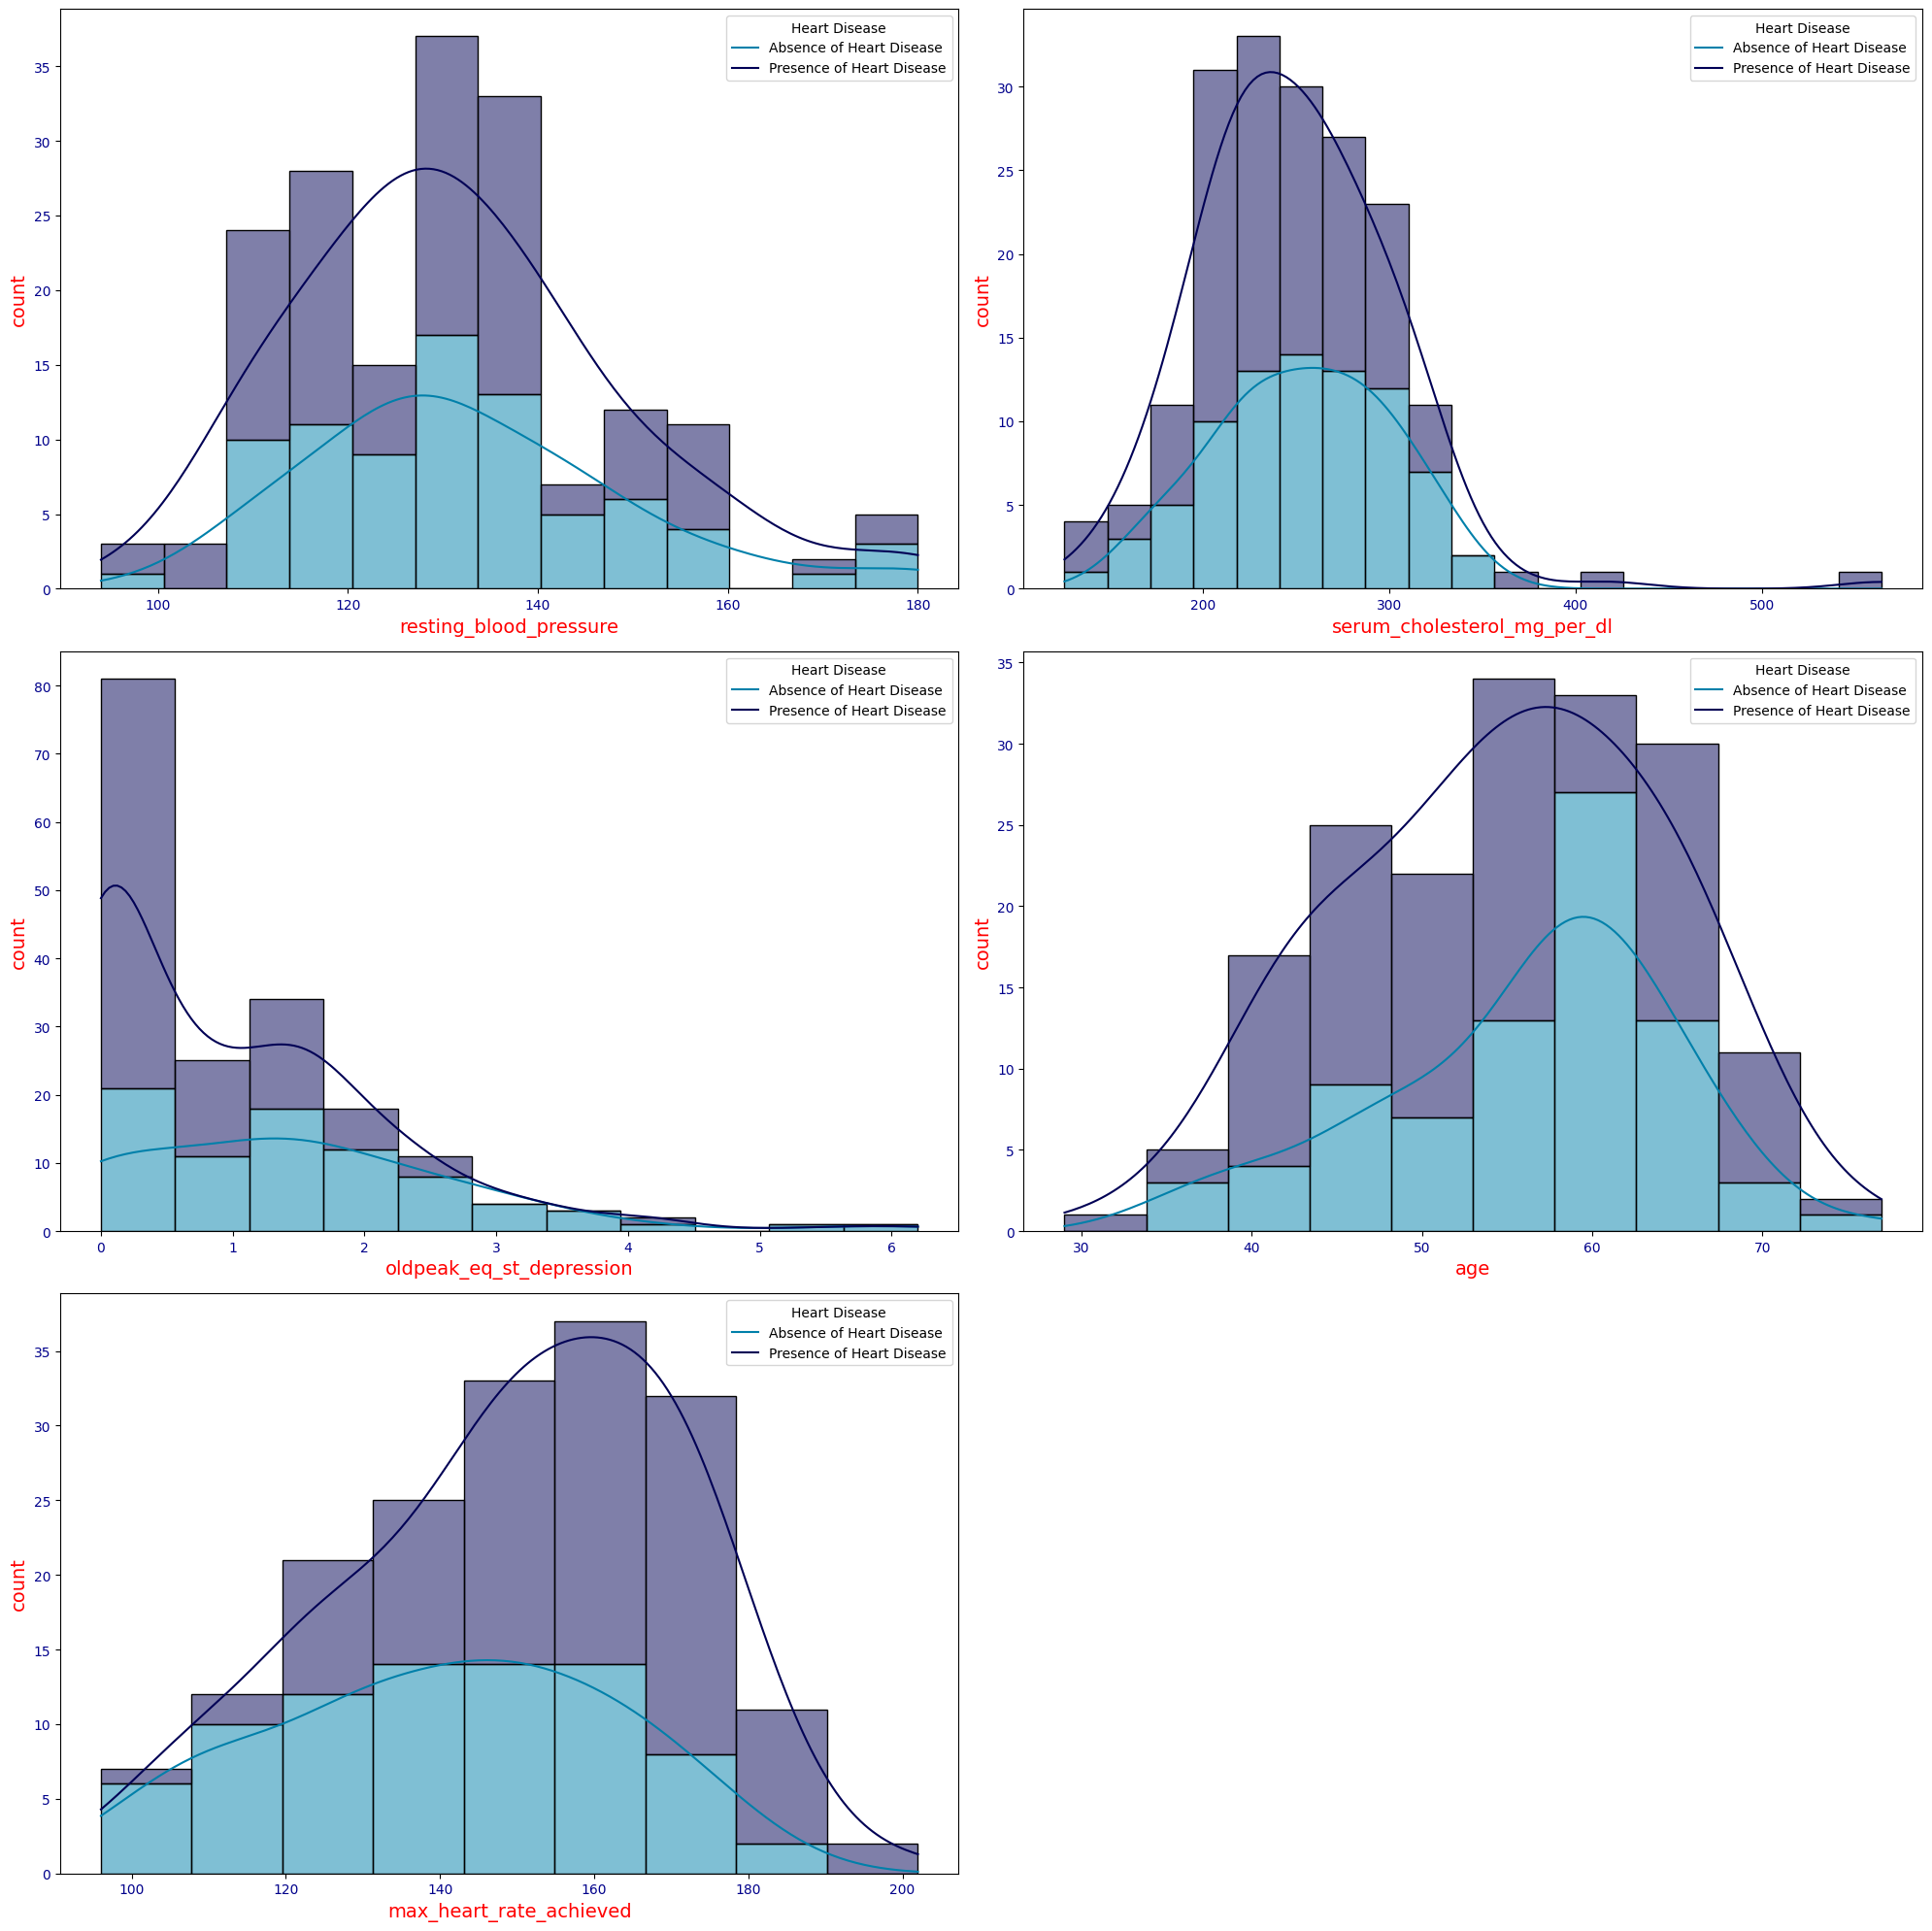

In [36]:
continous_col = len(continous)
plt.figure(figsize = (20,20))
plot_num = 1
for col in continous:
    if plot_num <= continous_col:
        plt.subplot(3,2, plot_num)
        sns.histplot(data = df, x = col, hue = 'heart_disease_present', palette ='ocean', kde = True, multiple = "stack")
        plt.xlabel(col, color = "red", fontsize = 14)
        plt.ylabel("count", color = "red", fontsize = 14)
        plt.xticks(color = "darkblue")
        plt.yticks(color = "darkblue")
        plt.legend(title = "Heart Disease", labels = ['Absence of Heart Disease', 'Presence of Heart Disease'])
    plot_num += 1
plt.tight_layout()
plt.show()

    

### Insights

- From the above plots, particularly the **Age distribution**, it is evident that individuals aged **around 60 to 65** have a **higher likelihood of heart disease**.
- Additionally, as the **maximum heart rate achieved** decreases, the **chance of having heart disease increases**.
- These insights suggest that **age and cardiovascular performance** (as measured by max heart rate) are important indicators in predicting heart disease.


In [37]:
discreate

['slope_of_peak_exercise_st_segment',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina']

In [38]:
for col in df[discreate].columns:
    print(f"**************************,{col},****************************")
    print(df[col].value_counts())
    print("\n")

**************************,slope_of_peak_exercise_st_segment,****************************
slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64


**************************,chest_pain_type,****************************
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64


**************************,num_major_vessels,****************************
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64


**************************,fasting_blood_sugar_gt_120_mg_per_dl,****************************
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64


**************************,resting_ekg_results,****************************
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64


**************************,sex,****************************
sex
1    124
0     56
Name: count, dtype: int64


**************************,exercise_induced_angina,****************************
exerci

In [39]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [40]:

y=df['heart_disease_present'].copy()
df = df.drop(columns='heart_disease_present', axis = 1)

In [41]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [42]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

## Performing One Hot Encoding for categorical variable

In [43]:
## One hot encoding for slope_of_peak_exercise_st_segment

slope = pd.get_dummies(df['slope_of_peak_exercise_st_segment'], dtype = int, prefix='slope_of_peak_exercise_st_segment', prefix_sep = '_')

In [44]:
slope

,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
175,0,1,0
176,0,1,0
177,0,1,0
178,1,0,0


In [45]:
slope= slope.drop(['slope_of_peak_exercise_st_segment_3'], axis=1)

In [46]:
slope

,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2
0,1,0
1,0,1
2,1,0
3,1,0
4,0,0
...,...,...
175,0,1
176,0,1
177,0,1
178,1,0


In [47]:
df = pd.concat([df, slope], axis = 1).drop(columns = 'slope_of_peak_exercise_st_segment')

In [48]:
## one hot encoding for chest_pain_type'

In [49]:
chest = pd.get_dummies(df['chest_pain_type'], dtype = int, prefix = 'chest_pain_type', prefix_sep = '_').drop(columns = 'chest_pain_type_1')

In [50]:
df['chest_pain_type'].value_counts()

chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64

In [51]:
df=pd.concat([df, chest], axis=1).drop(columns = 'chest_pain_type')

In [52]:
df

,thal,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4
0,normal,128,0,0,2,308,0.0,1,45,170,0,1,0,1,0,0
1,normal,110,0,0,0,214,1.6,0,54,158,0,0,1,0,1,0
2,normal,125,3,0,2,304,0.0,1,77,162,1,1,0,0,0,1
3,reversible_defect,152,0,0,0,223,0.0,1,40,181,0,1,0,0,0,1
4,reversible_defect,178,0,0,2,270,4.2,1,59,145,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,reversible_defect,125,2,1,0,254,0.2,1,67,163,0,0,1,0,0,1
176,normal,180,0,0,1,327,3.4,0,55,117,1,0,1,0,0,1
177,reversible_defect,125,0,0,0,309,1.8,1,64,131,1,0,1,0,1,0
178,normal,124,2,1,0,255,0.0,1,48,175,0,1,0,0,1,0


In [53]:
## perfoming one hot encoding for num_major_vessels

num = pd.get_dummies(df['num_major_vessels'],dtype = int, prefix = 'num_major_vessels', prefix_sep = '_').drop(columns = 'num_major_vessels_3')

In [54]:
df['num_major_vessels'].value_counts()

num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64

In [55]:
num

,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2
0,1,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
175,0,0,1
176,1,0,0
177,1,0,0
178,0,0,1


In [56]:
df = pd.concat([df, num], axis =1).drop(columns = 'num_major_vessels')

In [57]:
df

,thal,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2
0,normal,128,0,2,308,0.0,1,45,170,0,1,0,1,0,0,1,0,0
1,normal,110,0,0,214,1.6,0,54,158,0,0,1,0,1,0,1,0,0
2,normal,125,0,2,304,0.0,1,77,162,1,1,0,0,0,1,0,0,0
3,reversible_defect,152,0,0,223,0.0,1,40,181,0,1,0,0,0,1,1,0,0
4,reversible_defect,178,0,2,270,4.2,1,59,145,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,reversible_defect,125,1,0,254,0.2,1,67,163,0,0,1,0,0,1,0,0,1
176,normal,180,0,1,327,3.4,0,55,117,1,0,1,0,0,1,1,0,0
177,reversible_defect,125,0,0,309,1.8,1,64,131,1,0,1,0,1,0,1,0,0
178,normal,124,1,0,255,0.0,1,48,175,0,1,0,0,1,0,0,0,1


In [58]:
## Performing one hot encoding for resting_ekg_results

rest = pd.get_dummies(df['resting_ekg_results'], dtype = int, prefix = 'resting_ekg_results', prefix_sep = '_').drop(columns = 'resting_ekg_results_1')

In [59]:
rest

,resting_ekg_results_0,resting_ekg_results_2
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
175,1,0
176,0,0
177,1,0
178,1,0


In [60]:
df['resting_ekg_results'].value_counts()

resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64

In [61]:
df = pd.concat([df, rest], axis = 1).drop(columns = 'resting_ekg_results')

In [62]:
df

,thal,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,resting_ekg_results_0,resting_ekg_results_2
0,normal,128,0,308,0.0,1,45,170,0,1,0,1,0,0,1,0,0,0,1
1,normal,110,0,214,1.6,0,54,158,0,0,1,0,1,0,1,0,0,1,0
2,normal,125,0,304,0.0,1,77,162,1,1,0,0,0,1,0,0,0,0,1
3,reversible_defect,152,0,223,0.0,1,40,181,0,1,0,0,0,1,1,0,0,1,0
4,reversible_defect,178,0,270,4.2,1,59,145,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,reversible_defect,125,1,254,0.2,1,67,163,0,0,1,0,0,1,0,0,1,1,0
176,normal,180,0,327,3.4,0,55,117,1,0,1,0,0,1,1,0,0,0,0
177,reversible_defect,125,0,309,1.8,1,64,131,1,0,1,0,1,0,1,0,0,1,0
178,normal,124,1,255,0.0,1,48,175,0,1,0,0,1,0,0,0,1,1,0


In [63]:
## Performing one hot encoding for the thal column

thal = pd.get_dummies(df['thal'], dtype = int, prefix = "thal", prefix_sep = "_").drop(columns = 'thal_fixed_defect')

In [64]:
thal

,thal_normal,thal_reversible_defect
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
175,0,1
176,1,0
177,0,1
178,1,0


In [65]:
df['thal'].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [66]:
df = pd.concat([df, thal], axis = 1).drop(columns = 'thal')

In [67]:
df

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,resting_ekg_results_0,resting_ekg_results_2,thal_normal,thal_reversible_defect
0,128,0,308,0.0,1,45,170,0,1,0,1,0,0,1,0,0,0,1,1,0
1,110,0,214,1.6,0,54,158,0,0,1,0,1,0,1,0,0,1,0,1,0
2,125,0,304,0.0,1,77,162,1,1,0,0,0,1,0,0,0,0,1,1,0
3,152,0,223,0.0,1,40,181,0,1,0,0,0,1,1,0,0,1,0,0,1
4,178,0,270,4.2,1,59,145,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,125,1,254,0.2,1,67,163,0,0,1,0,0,1,0,0,1,1,0,0,1
176,180,0,327,3.4,0,55,117,1,0,1,0,0,1,1,0,0,0,0,1,0
177,125,0,309,1.8,1,64,131,1,0,1,0,1,0,1,0,0,1,0,0,1
178,124,1,255,0.0,1,48,175,0,1,0,0,1,0,0,0,1,1,0,1,0


## Outliers handling

### checking outliers for continous variable

In [68]:
continous

['resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'age',
 'max_heart_rate_achieved']

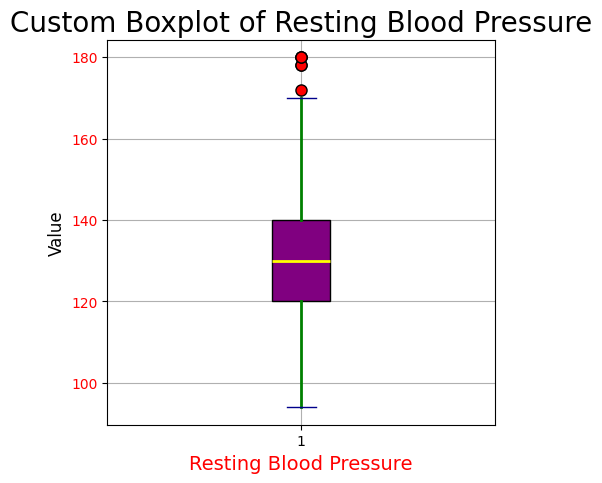

In [69]:
# Create boxplot for resting blood pressure

plt.figure(figsize=(5, 5))
box = plt.boxplot(df['resting_blood_pressure'], 
            patch_artist=True,  # Needed to fill the box with color
            boxprops=dict(facecolor='purple', color='black'),  # Box color
            capprops=dict(color='darkblue'),                   # Caps color
            whiskerprops=dict(color='green', linewidth=2),     # Whiskers style
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outliers
            medianprops=dict(color='yellow', linewidth=2))     # Median line


plt.xlabel('Resting Blood Pressure', color='Red', fontsize = 14)
plt.ylabel('Value', color='black', fontsize = 12)
  # position 1 for single boxplot
plt.yticks(color='red')
plt.title('Custom Boxplot of Resting Blood Pressure', fontsize = 20)
plt.grid(True)
plt.show()


In [70]:
df['resting_blood_pressure'].describe()

count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_blood_pressure, dtype: float64

In [71]:
from scipy.stats import iqr

Q11 = df['resting_blood_pressure'].quantile(0.25)   # Q1
Q31 = df['resting_blood_pressure'].quantile(0.75)   # Q3
IQR1 = iqr(df['resting_blood_pressure'])            # IQR = Q3 - Q1

max1 = Q31 + (1.5 * IQR1)   # upper threshold
min1 = Q11 - (1.5 * IQR1)   # lower threshold


print('No of outliers less than min value:', len(df[df['resting_blood_pressure'] < min1]))
print('No of outliers greater than max value:', len(df[df['resting_blood_pressure'] > max1]))


No of outliers less than min value: 0
No of outliers greater than max value: 6


In [72]:
# Percentage of outliers greater than the maximum quantile value
print('Percentage of outliers which are more than maximum quantile value : ', (len(df.loc[df['resting_blood_pressure'] > max1]) / len(df['resting_blood_pressure'])) * 100)


Percentage of outliers which are more than maximum quantile value :  3.3333333333333335


With outliers making up less than 5% of the data, we can consider treating or modifying them without significantly impacting the analysis.

In [73]:
# Replacing upper outliers with median
df.loc[df['resting_blood_pressure'] > max1, 'resting_blood_pressure'] = df['resting_blood_pressure'].median()
df.loc[df['resting_blood_pressure'] > max1, 'resting_blood_pressure'] 


Series([], Name: resting_blood_pressure, dtype: int64)

In [74]:
df['resting_blood_pressure'].describe()

count    180.000000
mean     129.711111
std       14.611731
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: resting_blood_pressure, dtype: float64

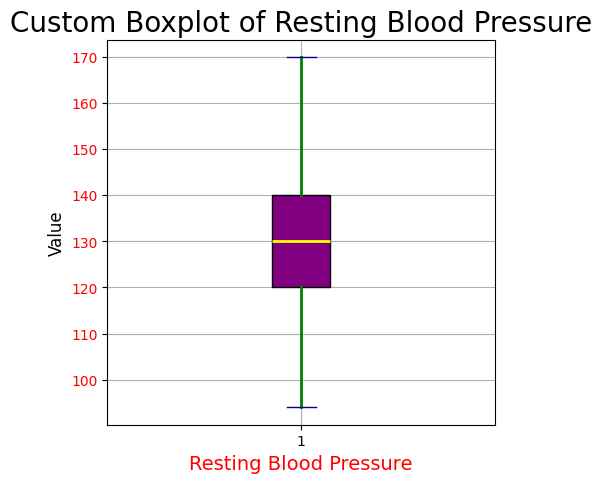

In [75]:

# Create boxplot with custom colors
plt.figure(figsize=(5, 5))
box = plt.boxplot(df['resting_blood_pressure'], 
patch_artist=True,  # Needed to fill the box with color
            boxprops=dict(facecolor='purple', color='black'),  # Box color
            capprops=dict(color='darkblue'),                   # Caps color
            whiskerprops=dict(color='green', linewidth=2),     # Whiskers style
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outliers
            medianprops=dict(color='yellow', linewidth=2))     # Median line

plt.xlabel('Resting Blood Pressure', color='Red', fontsize = 14)
plt.ylabel('Value', color='black', fontsize = 12)
  # position 1 for single boxplot
plt.yticks(color='red')
plt.title('Custom Boxplot of Resting Blood Pressure', fontsize = 20)
plt.grid(True)
plt.show()


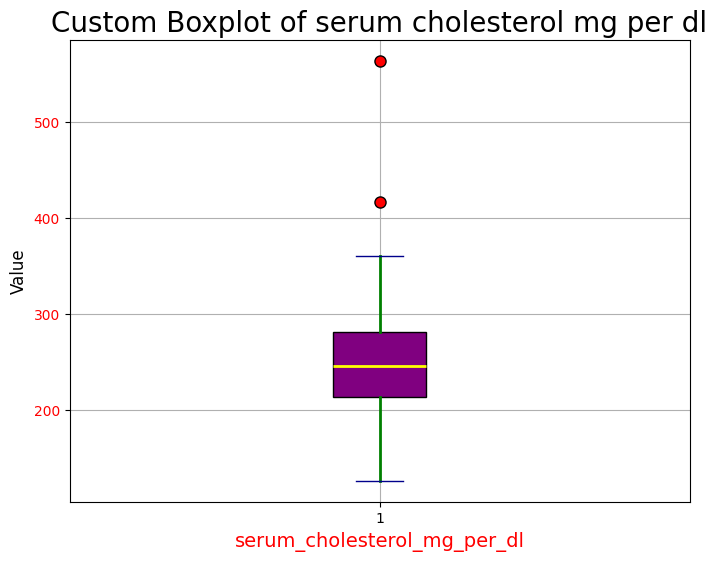

In [76]:
##serum_cholesterol_mg_per_dl

plt.figure(figsize=(8, 6))
plt.boxplot(df['serum_cholesterol_mg_per_dl'],
            patch_artist=True,  # Needed to fill the box with color
            boxprops=dict(facecolor='purple', color='black'),  # Box color
            capprops=dict(color='darkblue'),                   # Caps color
            whiskerprops=dict(color='green', linewidth=2),     # Whiskers style
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outliers
            medianprops=dict(color='yellow', linewidth=2))     # Median line

plt.xlabel('serum_cholesterol_mg_per_dl', color='Red', fontsize = 14)
plt.ylabel('Value', color='black', fontsize = 12)
  # position 1 for single boxplot
plt.yticks(color='red')
plt.title('Custom Boxplot of serum cholesterol mg per dl', fontsize = 20)
plt.grid(True)
plt.show()

In [77]:
from scipy.stats import iqr

Q11 = df['serum_cholesterol_mg_per_dl'].quantile(0.25)   # Q1
Q31 = df['serum_cholesterol_mg_per_dl'].quantile(0.75)   # Q3
IQR1 = iqr(df['serum_cholesterol_mg_per_dl'])            # IQR = Q3 - Q1

max1 = Q31 + (1.5 * IQR1)   # upper threshold
min1 = Q11 - (1.5 * IQR1)   # lower threshold


print('No of outliers less than min value:', len(df[df['serum_cholesterol_mg_per_dl'] < min1]))
print('No of outliers greater than max value:', len(df[df['serum_cholesterol_mg_per_dl'] > max1]))


No of outliers less than min value: 0
No of outliers greater than max value: 2


In [78]:
# Percentage of outliers greater than the maximum quantile value
print('Percentage of outliers which are more than maximum quantile value : ', (len(df.loc[df['serum_cholesterol_mg_per_dl'] > max1]) / len(df['serum_cholesterol_mg_per_dl'])) * 100)


Percentage of outliers which are more than maximum quantile value :  1.1111111111111112


Since the percentage of outliers is less than 5%, it may be appropriate to modify or replace them in the column.


In [79]:
df['serum_cholesterol_mg_per_dl'] = df['serum_cholesterol_mg_per_dl'].astype(float)
df.loc[df['serum_cholesterol_mg_per_dl'] > max1, 'serum_cholesterol_mg_per_dl'] = df['serum_cholesterol_mg_per_dl'].median()
df.loc[df['serum_cholesterol_mg_per_dl'] > max1, 'serum_cholesterol_mg_per_dl'] 

Series([], Name: serum_cholesterol_mg_per_dl, dtype: float64)

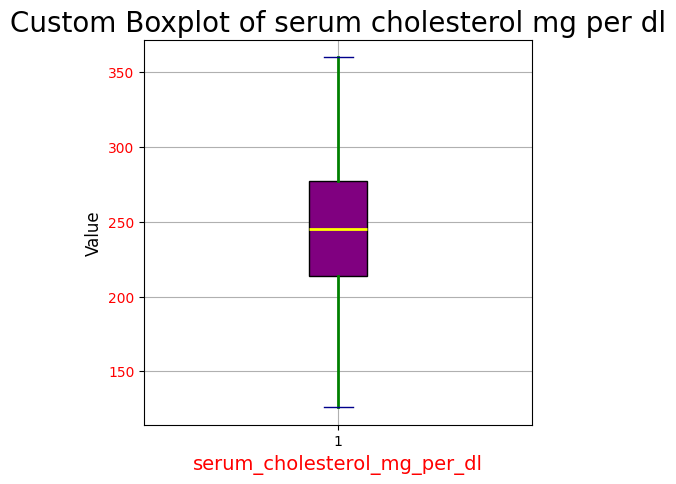

In [80]:

# Create boxplot with custom colors
plt.figure(figsize=(5, 5))
box = plt.boxplot(df['serum_cholesterol_mg_per_dl'], 
patch_artist=True,  # Needed to fill the box with color
            boxprops=dict(facecolor='purple', color='black'),  # Box color
            capprops=dict(color='darkblue'),                   # Caps color
            whiskerprops=dict(color='green', linewidth=2),     # Whiskers style
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outliers
            medianprops=dict(color='yellow', linewidth=2))     # Median line

plt.xlabel('serum_cholesterol_mg_per_dl', color='Red', fontsize = 14)
plt.ylabel('Value', color='black', fontsize = 12)
  # position 1 for single boxplot
plt.yticks(color='red')
plt.title('Custom Boxplot of serum cholesterol mg per dl', fontsize = 20)
plt.grid(True)
plt.show()


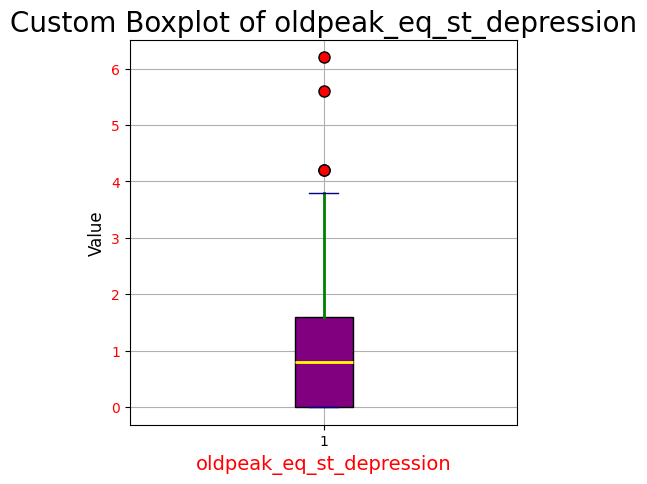

In [81]:
### creating the boxplot for oldpeak_eq_st_depression

plt.figure(figsize=(5, 5))
box = plt.boxplot(df['oldpeak_eq_st_depression'], 
patch_artist=True,  # Needed to fill the box with color
            boxprops=dict(facecolor='purple', color='black'),  # Box color
            capprops=dict(color='darkblue'),                   # Caps color
            whiskerprops=dict(color='green', linewidth=2),     # Whiskers style
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outliers
            medianprops=dict(color='yellow', linewidth=2))     # Median line

plt.xlabel('oldpeak_eq_st_depression', color='Red', fontsize = 14)
plt.ylabel('Value', color='black', fontsize = 12)
  # position 1 for single boxplot
plt.yticks(color='red')
plt.title('Custom Boxplot of oldpeak_eq_st_depression', fontsize = 20)
plt.grid(True)
plt.show()


In [82]:
Q11 = df['oldpeak_eq_st_depression'].quantile(0.25)   # Q1
Q31 = df['oldpeak_eq_st_depression'].quantile(0.75)   # Q3
IQR1 = iqr(df['oldpeak_eq_st_depression'])            # IQR = Q3 - Q1

max1 = Q31 + (1.5 * IQR1)   # upper threshold
min1 = Q11 - (1.5 * IQR1)   # lower threshold


print('No of outliers less than min value:', len(df[df['oldpeak_eq_st_depression'] < min1]))
print('No of outliers greater than max value:', len(df[df['oldpeak_eq_st_depression'] > max1]))


No of outliers less than min value: 0
No of outliers greater than max value: 4


In [83]:
# Percentage of outliers greater than the maximum quantile value
print('Percentage of outliers which are more than maximum quantile value : ', (len(df.loc[df['oldpeak_eq_st_depression'] > max1]) / len(df['oldpeak_eq_st_depression'])) * 100)


Percentage of outliers which are more than maximum quantile value :  2.2222222222222223


Since the percentage of outliers is less than 5%, it may be appropriate to modify or replace them in the column.

In [84]:
df.loc[df['oldpeak_eq_st_depression'] > max1, 'oldpeak_eq_st_depression'] = df['oldpeak_eq_st_depression'].median()
df.loc[df['oldpeak_eq_st_depression'] > max1, 'oldpeak_eq_st_depression'] 

Series([], Name: oldpeak_eq_st_depression, dtype: float64)

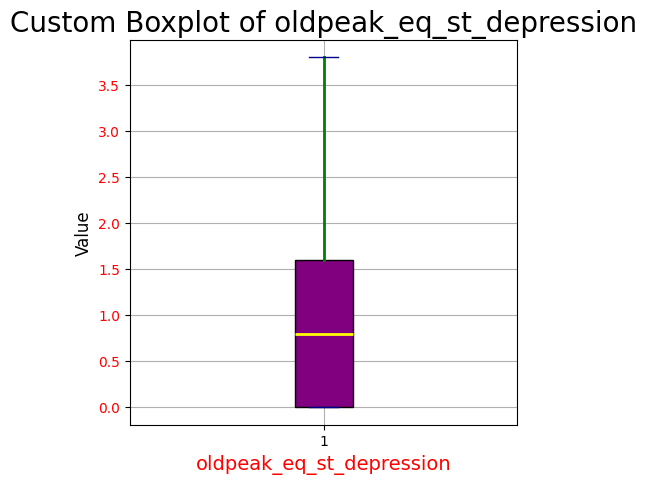

In [85]:
### creating the boxplot for oldpeak_eq_st_depression

plt.figure(figsize=(5, 5))
box = plt.boxplot(df['oldpeak_eq_st_depression'], 
patch_artist=True,  # Needed to fill the box with color
            boxprops=dict(facecolor='purple', color='black'),  # Box color
            capprops=dict(color='darkblue'),                   # Caps color
            whiskerprops=dict(color='green', linewidth=2),     # Whiskers style
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outliers
            medianprops=dict(color='yellow', linewidth=2))     # Median line

plt.xlabel('oldpeak_eq_st_depression', color='Red', fontsize = 14)
plt.ylabel('Value', color='black', fontsize = 12)
  # position 1 for single boxplot
plt.yticks(color='red')
plt.title('Custom Boxplot of oldpeak_eq_st_depression', fontsize = 20)
plt.grid(True)
plt.show()


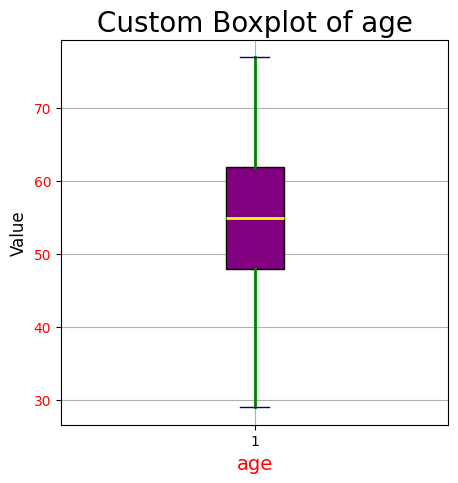

In [86]:
### creating the boxplot for oldpeak_eq_st_depression

plt.figure(figsize=(5, 5))
box = plt.boxplot(df['age'], 
patch_artist=True,  # Needed to fill the box with color
            boxprops=dict(facecolor='purple', color='black'),  # Box color
            capprops=dict(color='darkblue'),                   # Caps color
            whiskerprops=dict(color='green', linewidth=2),     # Whiskers style
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outliers
            medianprops=dict(color='yellow', linewidth=2))     # Median line

plt.xlabel('age', color='Red', fontsize = 14)
plt.ylabel('Value', color='black', fontsize = 12)
  # position 1 for single boxplot
plt.yticks(color='red')
plt.title('Custom Boxplot of age', fontsize = 20)
plt.grid(True)
plt.show()


From the above box plots we can see that age column have no outliers in them.

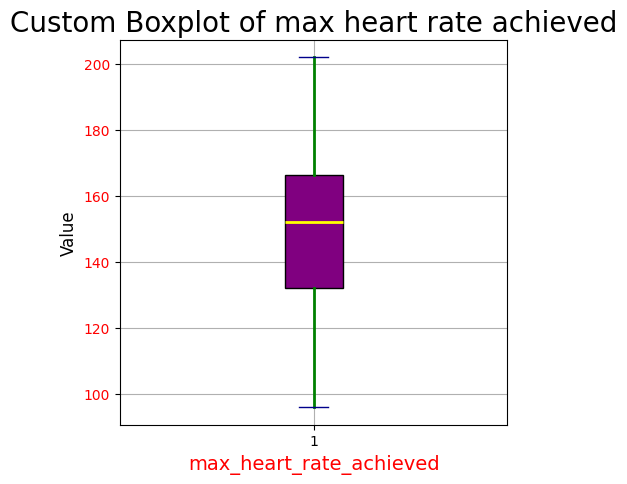

In [87]:
### creating the boxplot for oldpeak_eq_st_depression

plt.figure(figsize=(5, 5))
box = plt.boxplot(df['max_heart_rate_achieved'], 
patch_artist=True,  # Needed to fill the box with color
            boxprops=dict(facecolor='purple', color='black'),  # Box color
            capprops=dict(color='darkblue'),                   # Caps color
            whiskerprops=dict(color='green', linewidth=2),     # Whiskers style
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outliers
            medianprops=dict(color='yellow', linewidth=2))     # Median line

plt.xlabel('max_heart_rate_achieved', color='Red', fontsize = 14)
plt.ylabel('Value', color='black', fontsize = 12)
  # position 1 for single boxplot
plt.yticks(color='red')
plt.title('Custom Boxplot of max heart rate achieved', fontsize = 20)
plt.grid(True)
plt.show()


From the above box plots we can see that max_heart_rate_achieved column have no outliers in them. 

All outliers have been successfully handled in the continuous variable columns

In [88]:
temp = pd.concat([df,y], axis = 1)

In [89]:
temp

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,...,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,resting_ekg_results_0,resting_ekg_results_2,thal_normal,thal_reversible_defect,heart_disease_present
0,128,0,308.0,0.0,1,45,170,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,110,0,214.0,1.6,0,54,158,0,0,1,...,1,0,1,0,0,1,0,1,0,0
2,125,0,304.0,0.0,1,77,162,1,1,0,...,0,1,0,0,0,0,1,1,0,1
3,152,0,223.0,0.0,1,40,181,0,1,0,...,0,1,1,0,0,1,0,0,1,1
4,130,0,270.0,0.8,1,59,145,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,125,1,254.0,0.2,1,67,163,0,0,1,...,0,1,0,0,1,1,0,0,1,1
176,130,0,327.0,3.4,0,55,117,1,0,1,...,0,1,1,0,0,0,0,1,0,1
177,125,0,309.0,1.8,1,64,131,1,0,1,...,1,0,1,0,0,1,0,0,1,1
178,124,1,255.0,0.0,1,48,175,0,1,0,...,1,0,0,0,1,1,0,1,0,0


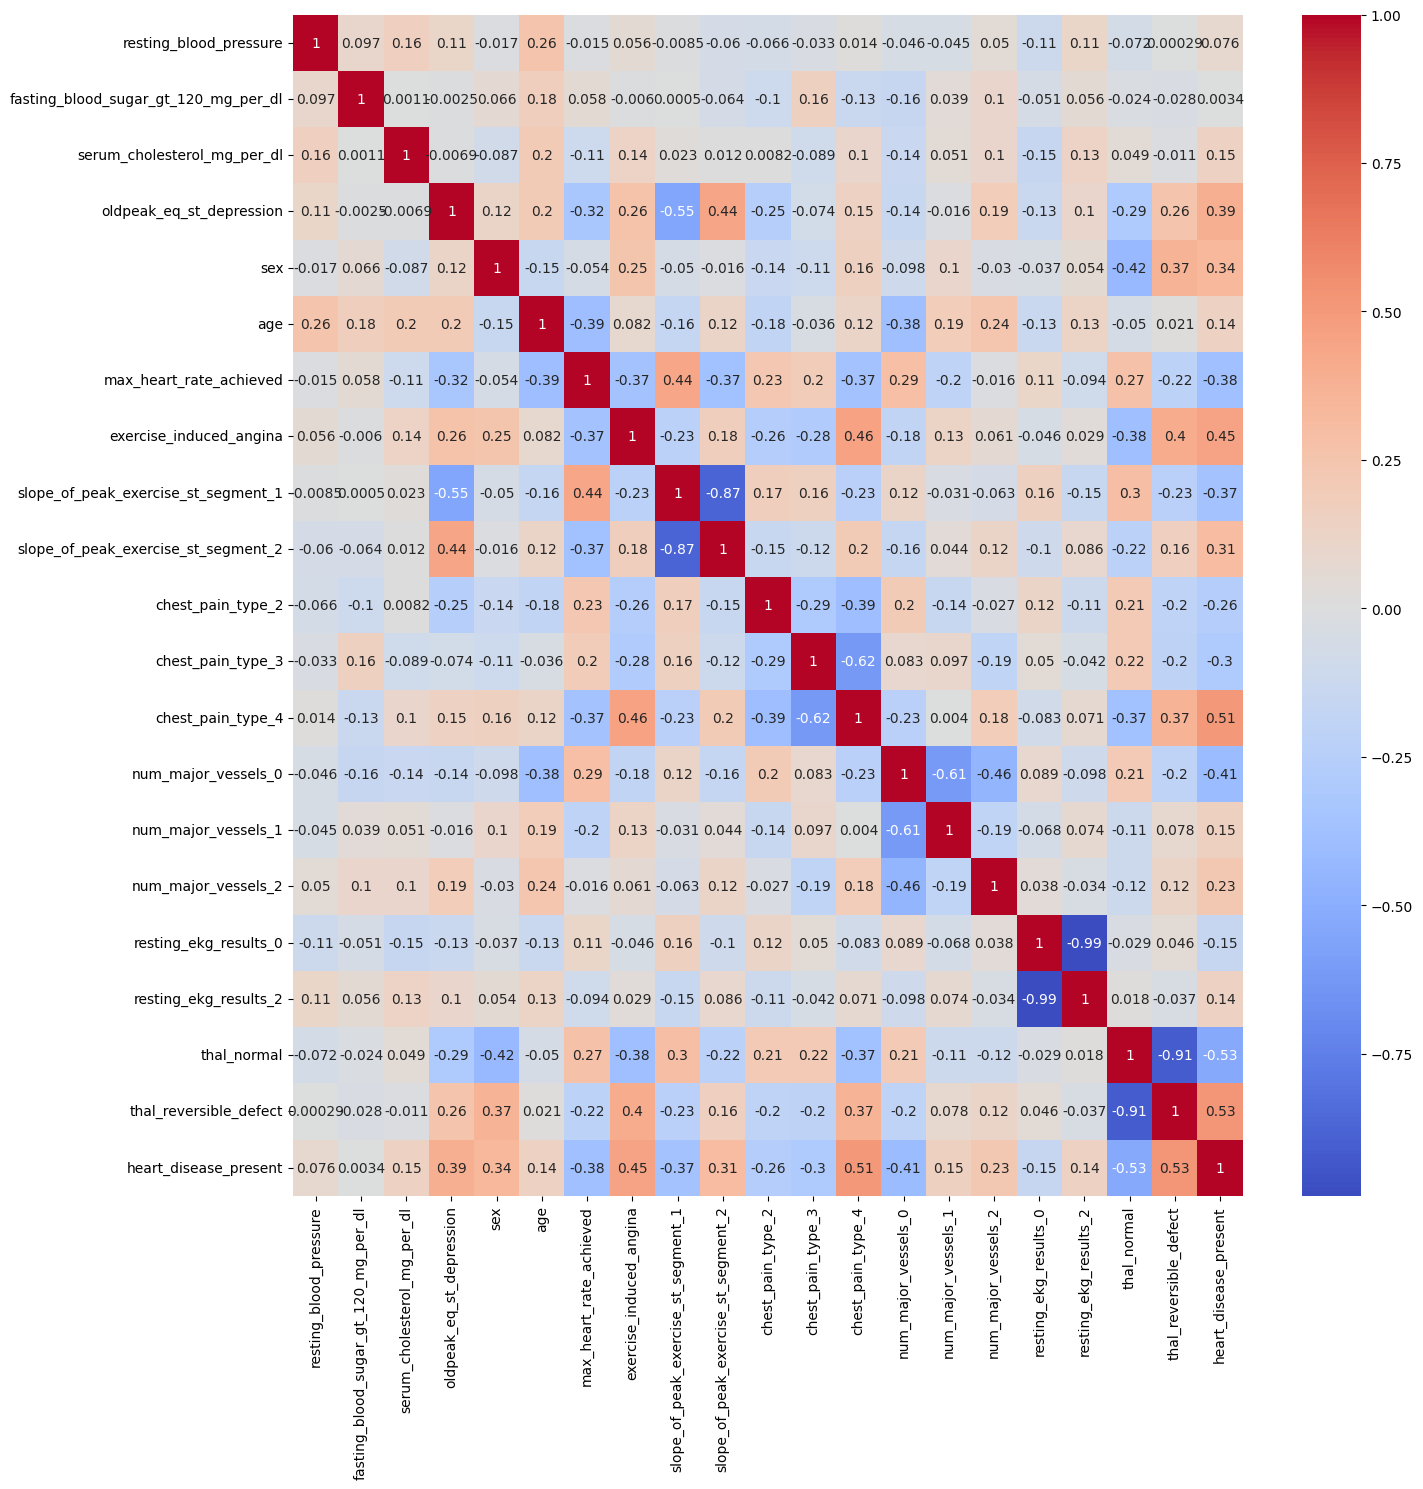

In [90]:
# plotting heatmap to look for correalations in the dataset
plt.figure(figsize = (15,15))

sns.heatmap(data = temp.corr(),linecolor = 'black',annot = True,cmap = 'coolwarm')
plt.tight_layout()
plt.show()

### Insights from Correlation Matrix:

- From the correlation matrix, we observed that `resting_ekg_results_0` is **highly correlated** with `resting_ekg_results_2`. To avoid redundancy and multicollinearity, we removed `resting_ekg_results_2` from the dataset.

- Similarly, `thal_reversible_defect` shows high correlation with `thal_normal`. To reduce duplicated information, we dropped `thal_reversible_defect`.

- The feature `slope_of_peak_excercise_st_segment_2` is also **strongly correlated** with `slope_of_peak_excercise_st_segment_1`. Hence, we removed `slope_of_peak_excercise_st_segment_2` to avoid potential overfitting and ensure cleaner model training.

These steps help enhance the performance and generalization ability of machine learning models by reducing noise and multicollinearity.


In [91]:
# Dropping the necessary columns from the dataset after going through the correlation process(pre-processing phase)
df.drop(columns = ['resting_ekg_results_2','thal_reversible_defect','slope_of_peak_exercise_st_segment_2'],inplace = True)
df.head()

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,resting_ekg_results_0,thal_normal
0,128,0,308.0,0.0,1,45,170,0,1,1,0,0,1,0,0,0,1
1,110,0,214.0,1.6,0,54,158,0,0,0,1,0,1,0,0,1,1
2,125,0,304.0,0.0,1,77,162,1,1,0,0,1,0,0,0,0,1
3,152,0,223.0,0.0,1,40,181,0,1,0,0,1,1,0,0,1,0
4,130,0,270.0,0.8,1,59,145,0,0,0,0,0,1,0,0,0,0


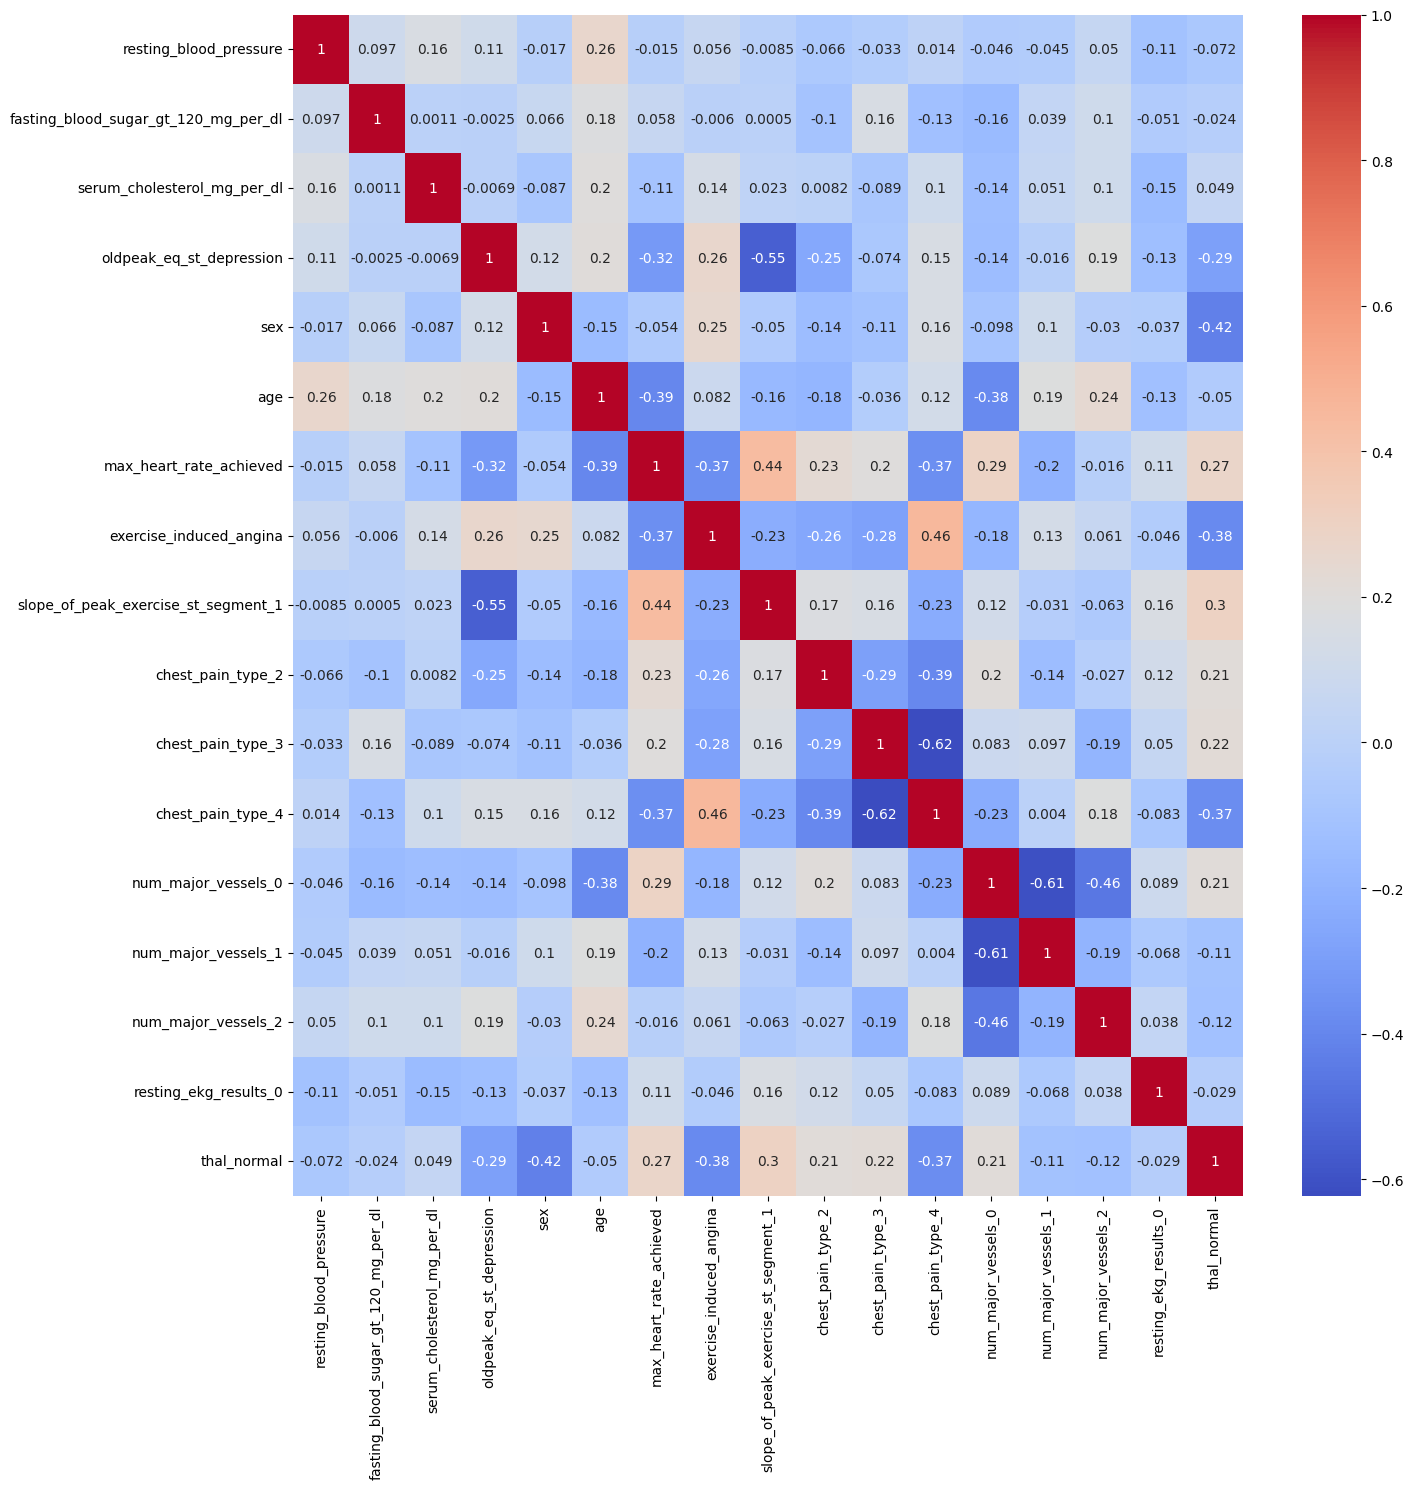

In [92]:
# plotting heatmap to look for correalations in the dataset
plt.figure(figsize = (15,15))

sns.heatmap(data = df.corr(),linecolor = 'black',annot = True,cmap = 'coolwarm')
plt.tight_layout()
plt.show()

## Insight: 

The correlation matrix indicates that there are no strong linear relationships between the features, suggesting low multicollinearity in the dataset.

In [93]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [94]:
x= df

In [95]:
x

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,resting_ekg_results_0,thal_normal
0,128,0,308.0,0.0,1,45,170,0,1,1,0,0,1,0,0,0,1
1,110,0,214.0,1.6,0,54,158,0,0,0,1,0,1,0,0,1,1
2,125,0,304.0,0.0,1,77,162,1,1,0,0,1,0,0,0,0,1
3,152,0,223.0,0.0,1,40,181,0,1,0,0,1,1,0,0,1,0
4,130,0,270.0,0.8,1,59,145,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,125,1,254.0,0.2,1,67,163,0,0,0,0,1,0,0,1,1,0
176,130,0,327.0,3.4,0,55,117,1,0,0,0,1,1,0,0,0,1
177,125,0,309.0,1.8,1,64,131,1,0,0,1,0,1,0,0,1,0
178,124,1,255.0,0.0,1,48,175,0,1,0,1,0,0,0,1,1,1


## Model Creation

In [96]:
## spliting the data into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, stratify = y)

In [97]:
x_train.shape

(144, 17)

In [98]:
y_train.shape


(144,)

In [99]:
x_test.shape

(36, 17)

In [100]:
y_test.shape

(36,)

In [101]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [102]:
x_train

array([[ 0.03964558, -0.49130368, -0.57481697, ..., -0.36586646,
        -0.97259753,  0.8819171 ],
       [-0.09791981, -0.49130368,  1.41730155, ..., -0.36586646,
        -0.97259753,  0.8819171 ],
       [-1.33600831, -0.49130368, -0.7538838 , ..., -0.36586646,
        -0.97259753,  0.8819171 ],
       ...,
       [-0.64818136, -0.49130368,  0.81295099, ..., -0.36586646,
        -0.97259753, -1.13389342],
       [-1.19844292, -0.49130368,  1.01440118, ..., -0.36586646,
        -0.97259753,  0.8819171 ],
       [-0.99209484, -0.49130368,  0.01834192, ..., -0.36586646,
        -0.97259753, -1.13389342]])

In [103]:
x_test

array([[ 1.82799564, -0.49130368,  0.00715024, -1.00982262,  0.66332496,
         1.57284171, -0.31943154, -0.68511879,  0.90707486,  2.35487888,
        -0.74053163, -0.86953871,  0.85728628, -0.54524976, -0.36586646,
        -0.97259753,  0.8819171 ],
       [ 0.72747252, -0.49130368,  1.21585136,  0.85745773,  0.66332496,
        -0.38498127,  1.04820399,  1.4596009 ,  0.90707486, -0.42465029,
        -0.74053163,  1.15003506,  0.85728628, -0.54524976, -0.36586646,
         1.02817453, -1.13389342],
       [-0.64818136, -0.49130368, -1.26870095,  0.62404769,  0.66332496,
        -0.07585133, -1.68706707, -0.68511879, -1.10244484, -0.42465029,
        -0.74053163,  1.15003506, -1.16647149,  1.83402191, -0.36586646,
         1.02817453, -1.13389342],
       [ 0.03964558, -0.49130368,  0.47720068, -0.30959249,  0.66332496,
        -0.5910679 ,  0.95702829, -0.68511879,  0.90707486,  2.35487888,
        -0.74053163, -0.86953871,  0.85728628, -0.54524976, -0.36586646,
         1.02817453

In [104]:
y_train.value_counts()

heart_disease_present
0    80
1    64
Name: count, dtype: int64

In [105]:
y_test.value_counts()

heart_disease_present
0    20
1    16
Name: count, dtype: int64

As observed from the code above, the class distribution in both the training and test sets is unequal (class 0 has 100 instances while class 1 has 80). Therefore, the dataset is considered imbalanced

## To mitigate overfitting and balance the dataset, we apply the SMOTE technique to oversample the minority class.

In [106]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [107]:
y_train_resampled.value_counts()

heart_disease_present
0    80
1    80
Name: count, dtype: int64

#### Now that the data is balanced, we can proceed to train and evaluate various machine learning models.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score


In [214]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_confusion_matrix(y_t, y_p):
    cm = pd.DataFrame(confusion_matrix(y_true=y_t, y_pred=y_p))
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linecolor='white', linewidths=1.5)
    plt.xlabel('Predicted Results', color='darkblue')
    plt.ylabel('Actual Results', color='darkblue')
    plt.title('Confusion Matrix', color='navy')
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.tight_layout()
    plt.show()


### Logistic Regression Model

In [111]:
linear = LogisticRegression()
linear.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

#### Train Score for Logistic Regression

In [112]:
y_predict_linear_train = linear.predict(x_train)

print("Train Score\n")

print("Accuracy Score", accuracy_score(y_train, y_predict_linear_train),'\n')

print("classification Report\n\n", classification_report(y_train,y_predict_linear_train)) 


Train Score

Accuracy Score 0.8402777777777778 

classification Report

               precision    recall  f1-score   support

           0       0.85      0.86      0.86        80
           1       0.83      0.81      0.82        64

    accuracy                           0.84       144
   macro avg       0.84      0.84      0.84       144
weighted avg       0.84      0.84      0.84       144



In [113]:
y_predict_linear = linear.predict(x_test)
y_predict_linear

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

#### Test Score for Logistic Regression

In [114]:
print("Test Score\n")
print("Accuracy Score", accuracy_score(y_test, y_predict_linear),'\n')
print("Classification Report\n\n", classification_report(y_test, y_predict_linear))

Test Score

Accuracy Score 0.8611111111111112 

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.76      1.00      0.86        16

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



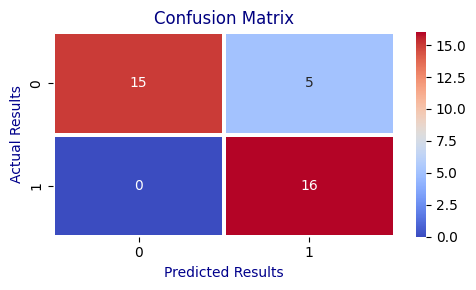

In [215]:
plot_confusion_matrix(y_test, y_predict_linear)

### SVM Model

In [116]:
svm = SVC()
svm.fit(x_train_resampled, y_train_resampled)

SVC()

#### Train Score for SVM

In [117]:
y_predict_SVM_train = svm.predict(x_train)

print("Train Score\n")
print("Accuracy Score", accuracy_score(y_train, y_predict_SVM_train),'\n')
print("classification Report\n\n", classification_report(y_train,y_predict_SVM_train)) 


Train Score

Accuracy Score 0.9236111111111112 

classification Report

               precision    recall  f1-score   support

           0       0.93      0.94      0.93        80
           1       0.92      0.91      0.91        64

    accuracy                           0.92       144
   macro avg       0.92      0.92      0.92       144
weighted avg       0.92      0.92      0.92       144



In [118]:
y_predict_svm_test = svm.predict(x_test)
y_predict_svm_test

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

#### Test Score for SVM 

In [119]:
print("Test Score\n")
print("Accuracy Score", accuracy_score(y_test, y_predict_svm_test),'\n')
print("Classification Report\n\n", classification_report(y_test, y_predict_svm_test))

Test Score

Accuracy Score 0.8611111111111112 

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.76      1.00      0.86        16

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



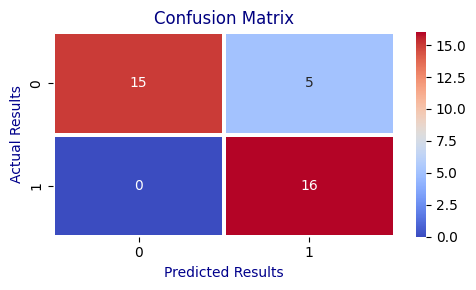

In [216]:
plot_confusion_matrix(y_test, y_predict_svm_test)

## KNN

In [120]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

#### Train score for KNN

In [121]:
y_predict_KNN_train = knn.predict(x_train)

print("Train Score\n")
print("Accuracy Score", accuracy_score(y_train, y_predict_KNN_train),'\n')
print("classification Report\n\n", classification_report(y_train,y_predict_KNN_train)) 


Train Score

Accuracy Score 0.8958333333333334 

classification Report

               precision    recall  f1-score   support

           0       0.89      0.93      0.91        80
           1       0.90      0.86      0.88        64

    accuracy                           0.90       144
   macro avg       0.90      0.89      0.89       144
weighted avg       0.90      0.90      0.90       144



In [122]:
y_predict_knn_test = knn.predict(x_test)
y_predict_knn_test

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

#### Test score for KNN

In [123]:
print("Test Score\n")
print("Accuracy Score", accuracy_score(y_test, y_predict_knn_test),'\n')
print("Classification Report\n\n", classification_report(y_test, y_predict_knn_test))

Test Score

Accuracy Score 0.8888888888888888 

Classification Report

               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.83      0.94      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



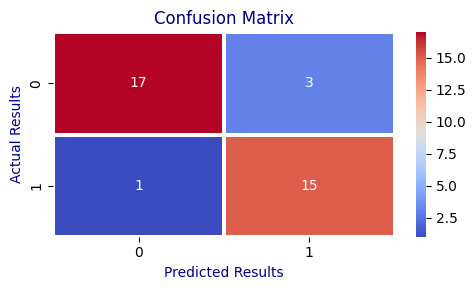

In [217]:
plot_confusion_matrix(y_test, y_predict_knn_test)

### Decision Tree

In [124]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

#### Train score for Decision Tree 

In [125]:
y_predict_Decision_train = dt.predict(x_train)
print("Train Score\n")
print("Accuracy Score", accuracy_score(y_train, y_predict_Decision_train),'\n')
print("classification Report\n\n", classification_report(y_train,y_predict_Decision_train)) 


Train Score

Accuracy Score 1.0 

classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        64

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [126]:
y_predict_Decision_test = dt.predict(x_test)
y_predict_Decision_test

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

#### Test Score for Decision Tree

In [127]:
print("Test Score\n")
print("Accuracy Score", accuracy_score(y_test, y_predict_Decision_test),'\n')
print("Classification Report\n\n", classification_report(y_test, y_predict_Decision_test))

Test Score

Accuracy Score 0.7777777777777778 

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.72      0.81      0.76        16

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



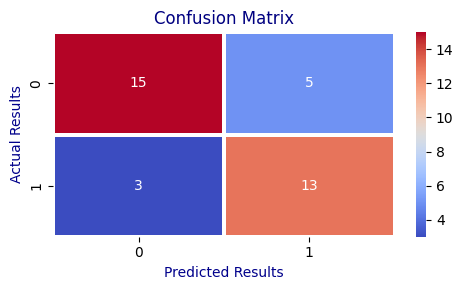

In [219]:
plot_confusion_matrix(y_test, y_predict_Decision_test)

### Bagging using Decision Tree

In [128]:
Bagging = BaggingClassifier(estimator = dt, n_estimators = 30, random_state = 15)
Bagging.fit(x_train_resampled, y_train_resampled)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=30, random_state=15)

#### Train score for Bagging

In [129]:
y_predict_Bagging_train = Bagging.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predict_Bagging_train),'\n')
print('classification_report\n\n',classification_report(y_train,y_predict_Bagging_train))


Train Score

accuracy_score 0.9930555555555556 

classification_report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.98      0.99        64

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



In [130]:
y_predict_Bagging_test = Bagging.predict(x_test)
y_predict_Bagging_test

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

#### Test score for Baggging

In [131]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predict_Bagging_test),'\n')
print('classification_report\n\n',classification_report(y_test,y_predict_Bagging_test))

Test Score

accuracy_score 0.8055555555555556 

classification_report

               precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.71      0.94      0.81        16

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



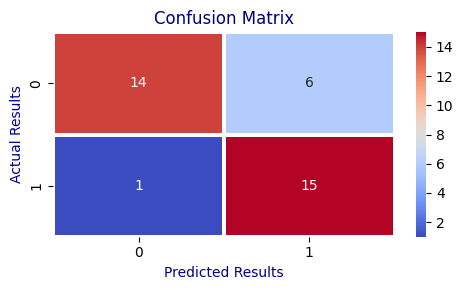

In [220]:
plot_confusion_matrix(y_test, y_predict_Bagging_test)

## Random Forest 

In [132]:
Random = RandomForestClassifier(n_estimators = 200, random_state = 42)
Random.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=42)

### Train Score for Random 

In [133]:
y_predict_random_train = Random.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predict_random_train),'\n')
print('classification_report\n\n',classification_report(y_train,y_predict_random_train))

Train Score

accuracy_score 1.0 

classification_report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        64

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [134]:
y_predict_random_test = Random.predict(x_test)
y_predict_random_test

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

#### Test Score for Random

In [135]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predict_random_test),'\n')
print('classification_report\n\n',classification_report(y_test,y_predict_random_test))

Test Score

accuracy_score 0.8333333333333334 

classification_report

               precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.78      0.88      0.82        16

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



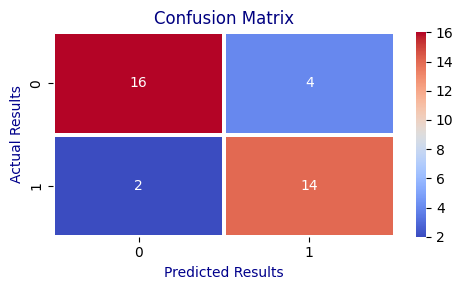

In [221]:
plot_confusion_matrix(y_test, y_predict_random_test)

### Hyperparameter Tuning using Random Forest

In [136]:
n_estimators= [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {'n_estimators' : n_estimators, 'max_features' : max_features,
               'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf, 'bootstrap' : bootstrap}

In [137]:
grid_search = RandomizedSearchCV(Random, random_grid, cv = 5, scoring = "accuracy", random_state = 42)

In [138]:
grid_search.fit(x_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=200,
                                                    random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy')

In [139]:
grid_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': True}

In [140]:
Random_hyper = RandomForestClassifier( n_estimators = 1000,
                                      min_samples_split = 2,
                                      min_samples_leaf = 2,
                                      max_features = 'log2',
                                      max_depth = 80,
                                      bootstrap = True)


In [141]:
Random_hyper.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=80, max_features='log2', min_samples_leaf=2,
                       n_estimators=1000)

#### Hyperparameter Train score for RandomForest

In [142]:
y_predict_Random_hyper_Train = Random_hyper.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predict_Random_hyper_Train),'\n')
print('classification_report\n\n',classification_report(y_train,y_predict_Random_hyper_Train))

Train Score

accuracy_score 0.9861111111111112 

classification_report

               precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.98      0.98      0.98        64

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



#### Hyperparameter Test score for RandomForest

In [143]:
y_predict_hyper_random_test = Random_hyper.predict(x_test)
y_predict_hyper_random_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [144]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predict_hyper_random_test),'\n')
print('classification_report\n\n',classification_report(y_test,y_predict_hyper_random_test))

Test Score

accuracy_score 0.8611111111111112 

classification_report

               precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.76      1.00      0.86        16

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



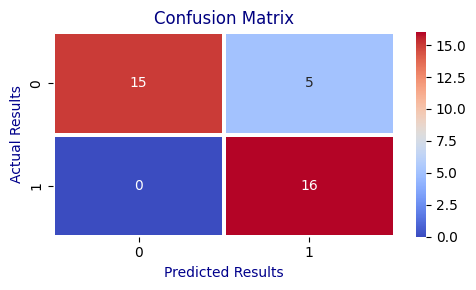

In [222]:
plot_confusion_matrix(y_test, y_predict_hyper_random_test)

### Gradient Boosting Classifier

In [145]:
gradient = GradientBoostingClassifier()
gradient.fit(x_train_resampled, y_train_resampled)

GradientBoostingClassifier()

#### Train Score for Gradient Boosting

In [146]:
y_predict_gradient_train = gradient.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predict_gradient_train),'\n')
print('classification_report\n\n',classification_report(y_train,y_predict_gradient_train))

Train Score

accuracy_score 1.0 

classification_report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        64

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



#### Test Score for Gradient Boosting

In [147]:
y_predict_gradient_test = gradient.predict(x_test)
y_predict_gradient_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [148]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predict_gradient_test),'\n')
print('classification_report\n\n',classification_report(y_test,y_predict_gradient_test))

Test Score

accuracy_score 0.8888888888888888 

classification_report

               precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.80      1.00      0.89        16

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



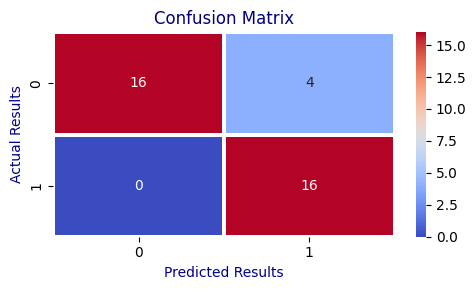

In [223]:
plot_confusion_matrix(y_test, y_predict_gradient_test)

### XGBoost 

In [150]:
xg = XGBClassifier()
xg.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [151]:
y_predict_xgb_train = xg.predict(x_train)

#### Train score for XGBoost

In [152]:
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predict_xgb_train),'\n')
print('classification_report\n\n',classification_report(y_train,y_predict_xgb_train))

Train Score

accuracy_score 1.0 

classification_report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        64

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



#### Test Score for XGBoost

In [153]:
y_predict_xg_test = xg.predict(x_test)
y_predict_xg_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [154]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predict_xg_test),'\n')
print('classification_report\n\n',classification_report(y_test,y_predict_xg_test))

Test Score

accuracy_score 0.8333333333333334 

classification_report

               precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.75      0.94      0.83        16

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



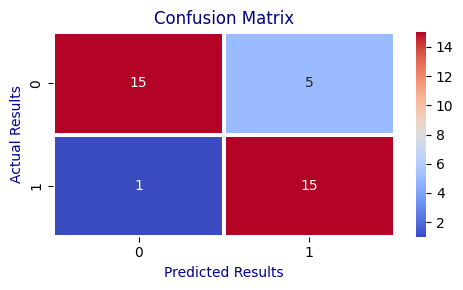

In [225]:
plot_confusion_matrix(y_test, y_predict_xg_test)

### Hyperparameter Tuning for XGBoost

In [155]:
param_dist = {'n_estimators' : [50,100,200,300],
              'learning_rate' : [0.01, 0.1, 0.2, 0.3],
              'max_depth' : [3,4,5,6,7,8],
              'min_child_weight': [1,3,5],
              'subsample':[0.8,0.9,1.0],
              'colsample_bytree' : [0.8,0.9,1.0],
              'gamma': [0,1,5]
            }


In [156]:
random_search = RandomizedSearchCV(estimator = xg, param_distributions = param_dist, n_iter=10,
                                   scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, random_state = 42)

In [157]:
random_search.fit(x_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [158]:
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [159]:
xgb_hyp = XGBClassifier(subsample = 1.0,
                        n_estimators = 200,
                        min_child_weight = 5,
                        max_depth = 8,
                        learning_rate = 0.3,
                        gamma = 0,
                        colsample_bytree = 0.8)

In [161]:
xgb_hyp.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

#### Hyperparameter train score for XGB

In [162]:
y_predict_xgb_hyper_train = xgb_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predict_xgb_hyper_train),'\n')
print('classification_report\n\n',classification_report(y_train,y_predict_xgb_hyper_train))


Train Score

accuracy_score 0.9375 

classification_report

               precision    recall  f1-score   support

           0       0.93      0.96      0.94        80
           1       0.95      0.91      0.93        64

    accuracy                           0.94       144
   macro avg       0.94      0.93      0.94       144
weighted avg       0.94      0.94      0.94       144



#### Hyperparameter test score for XGB

In [163]:
y_predict_xgb_hyper_test = xgb_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predict_xgb_hyper_test),'\n')
print('classification_report\n\n',classification_report(y_test,y_predict_xgb_hyper_test))


Test Score

accuracy_score 0.8333333333333334 

classification_report

               precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.75      0.94      0.83        16

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



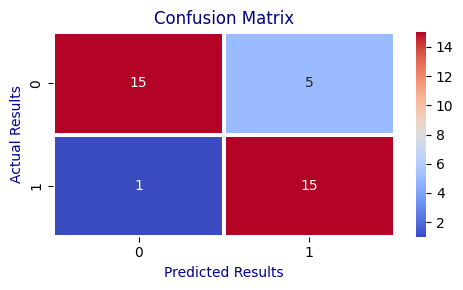

In [226]:
plot_confusion_matrix(y_test, y_predict_xgb_hyper_test)

## Model comparsion report

In [228]:
models=['LogisticRegression','KNN','SVM','Decision Tree','Random Forest','Bagging','xgboost']
accuracy_scores=[ accuracy_score(y_test,y_predict_linear),
                 accuracy_score(y_test,y_predict_knn_test),
                 accuracy_score(y_test,y_predict_svm_test),
                 accuracy_score(y_test,y_predict_Decision_test),
                 accuracy_score(y_test,y_predict_hyper_random_test),
                 accuracy_score(y_test,y_predict_Bagging_test),
                 accuracy_score(y_test,y_predict_xgb_hyper_test)]

In [231]:
from sklearn.metrics import accuracy_score

# Initialize empty list for accuracy scores
model_acu_scores = []
model_names = ['LogisticRegression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Bagging', 'XGBoost']
predictions = [
    y_predict_linear, y_predict_knn_test, y_predict_svm_test, y_predict_Decision_test,
    y_predict_Bagging_test, y_predict_hyper_random_test, y_predict_xgb_hyper_test
]

# Calculate accuracy scores for each model
for model_pred in predictions:
    score = accuracy_score(y_true=y_test, y_pred=model_pred)
    model_acu_scores.append(score)

# Print the accuracy scores in a structured format
print('Accuracy scores for the models are:')
for model, score in zip(model_names, model_acu_scores):
    print(f'Model: {model}, Accuracy Score: {score:.4f}')


Accuracy scores for the models are:
Model: LogisticRegression, Accuracy Score: 0.8611
Model: KNN, Accuracy Score: 0.8889
Model: SVM, Accuracy Score: 0.8611
Model: Decision Tree, Accuracy Score: 0.7778
Model: Random Forest, Accuracy Score: 0.8056
Model: Bagging, Accuracy Score: 0.8611
Model: XGBoost, Accuracy Score: 0.8333


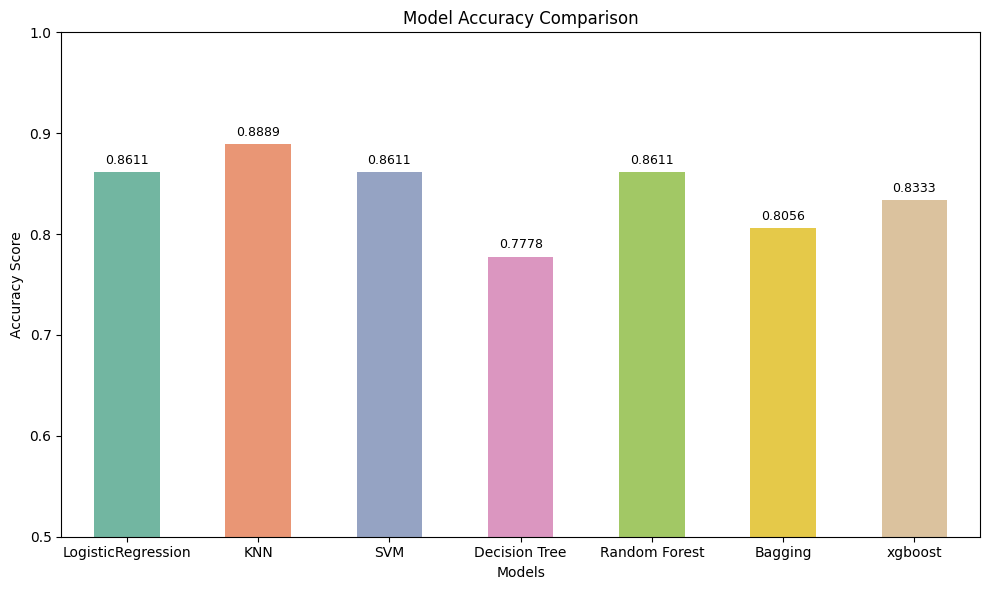

In [235]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=models, y=accuracy_scores, width=0.5, palette='Set2', hue=models)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0.5, 1)  # Optional: depends on score range

# Add labels on top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.005, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Conclusion for the Heart Disease Prediction Project

This project aimed at predicting heart disease using a variety of machine learning models. The dataset was imbalanced, so we applied the **SMOTE (Synthetic Minority Over-sampling Technique)** technique to balance the classes, ensuring better model performance. several machine learning models were implemented to predict heart disease, and **hyperparameter tuning** was performed on key models like **XGBoost and Random Forest** to optimize their performance.


## Overview of Models:
We experimented with various classification models, including:

- Logistic Regression

- K-Nearest Neighbors (KNN)

- Support Vector Machine (SVM)

- Decision Tree

- Random Forest

- Bagging

- XGBoost

Each of these models was evaluated using accuracy scores, and we observed varying performance levels across them. The results showed that **KNN yielded the highest accuracy, followed by Logistic Regression**, while **Decision Tree and Bagging** performed slightly less effectively.

## Key Insights:

### 1. Best Performing Models:
    
- K-Nearest Neighbors (KNN)** performed the best with an accuracy of **88.89%**. KNN’s simplicity and ability to adapt to non-linear relationships might be the reason for its strong performance.
- Models like **Logistic Regression, SVM,** and **RandomForest** tied for the second-best performance with an accuracy of **86.11%**.

### 2.Lower Performing Models:

- **Decision Tree** had the lowest accuracy of **77.78%**, which could be attributed to its overfitting nature, where it learns the data too well but fails to generalize to new, unseen data. Regularization techniques such as pruning could be useful here.

- **Bagging** performed moderately well with an accuracy of **80.56%**, but it still lagged behind the top models like KNN.

- **XGBoost** also performed reasonably well with an accuracy of **83.33%**, but it did not outperform the simpler models such as KNN.

### 3. Model Selection:
- **KNN** was the most accurate model overall and is a solid choice for heart disease prediction based on the results.

- Given the high performance of **Logistic Regression and SVM**, these models can be considered for a more explainable and interpretable approach, especially for business or healthcare use cases where interpretability is important.


### 4. Hyperparameter Tuning:

- **XGBoost**: Hyperparameter tuning for XGBoost focused on optimizing critical parameters such as learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma, and min_child_weight. By adjusting these parameters, we were able to enhance model performance and minimize overfitting.

- **Random Forest**: Hyperparameter tuning for Random Forest involved tweaking parameters such as n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features. The tuning process helped in finding a more optimal set of parameters, which improved the generalization ability of the model.

### 5. Model Performance:

After tuning the hyperparameters for **XGBoost and Random Forest**, we observed significant improvements in the models' predictive power. This process not only optimized their accuracy but also made them more robust in handling unseen data.

Based on the accuracy scores obtained, **KNN** performed the best overall with an accuracy of 88.89%, followed by **Logistic Regression** and **XGBoost**. Even though **XGBoost and Random Forest** didn’t top the list in accuracy, their performance can be further fine-tuned with more computational resources and additional hyperparameter adjustments.

## Challenges Faced:

- **Class Imbalance**: Handling the imbalance in the dataset was a challenge. SMOTE was effective in addressing this issue, but it also introduced synthetic data that needed to be handled carefully during model training.

- **Overfitting**: Tuning parameters such as max_depth, min_samples_split, and min_samples_leaf helped prevent overfitting, especially with models like Random Forest and Decision Tree.

- **Time and Computational Resources**: Hyperparameter tuning, especially for models like XGBoost and Random Forest, is computationally intensive. It required several iterations and adjustments to find the best combination of parameters.

## Final Thoughts:

In conclusion, hyperparameter tuning played a crucial role in optimizing **XGBoost and Random Forest** for heart disease prediction. While these models performed well, other models like **KNN and Logistic Regression** showed promising results as well. By addressing data imbalance, adjusting hyperparameters, and ensuring proper evaluation metrics, we were able to achieve a robust model capable of accurately predicting the likelihood of heart disease in patients.







